In [24]:
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd; pd.set_option('max_columns', 6)
import geopandas as gpd
import geoplot as gplt
import os, sys
os.getcwd()
#sys.path
#sys.executable

'/home/kesoh/esoh/uct/hmgReview'

In [2]:

usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
usa_cities.head()

id  POP_2010  ELEV_IN_FT STATE                     geometry
0   53   40888.0      1611.0    ND  POINT (-101.29627 48.23251)
1  101   52838.0       830.0    ND   POINT (-97.03285 47.92526)
2  153   15427.0      1407.0    ND   POINT (-98.70844 46.91054)
3  177  105549.0       902.0    ND   POINT (-96.78980 46.87719)
4  192   17787.0      2411.0    ND  POINT (-102.78962 46.87918)

<AxesSubplot:>

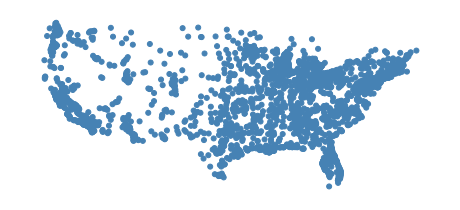

In [3]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities)

<AxesSubplot:>

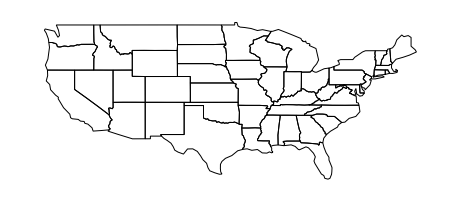

In [4]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

<AxesSubplot:>

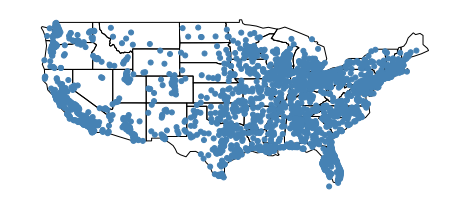

In [5]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

<GeoAxesSubplot:>

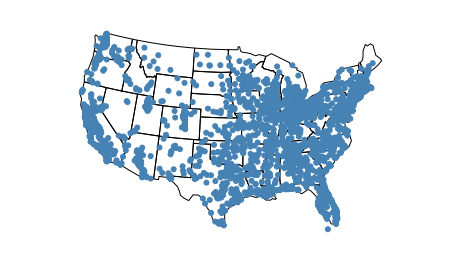

In [6]:
import geoplot.crs as gcrs

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

<GeoAxesSubplot:>

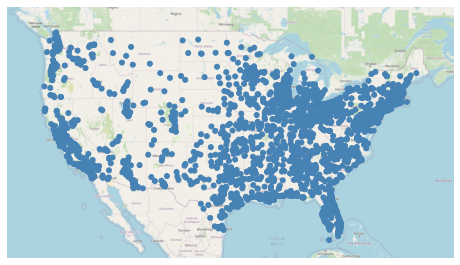

In [7]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax)

<GeoAxesSubplot:>

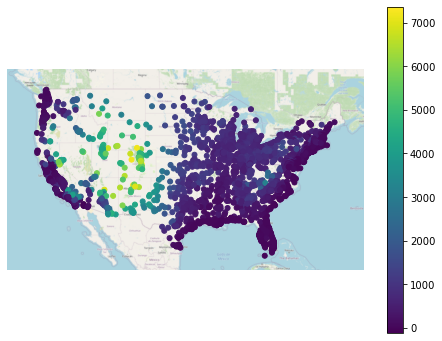

In [8]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax, hue='ELEV_IN_FT', legend=True)

<GeoAxesSubplot:>

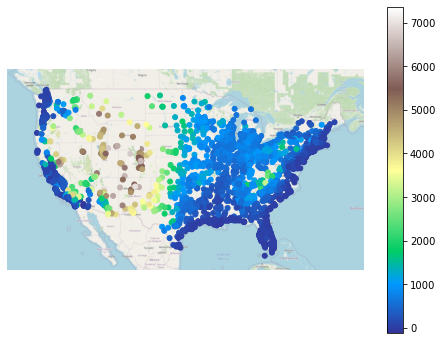

In [9]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax, hue='ELEV_IN_FT', cmap='terrain', legend=True)

Text(0.5, 1.0, 'Cities in the Continental United States by Elevation')

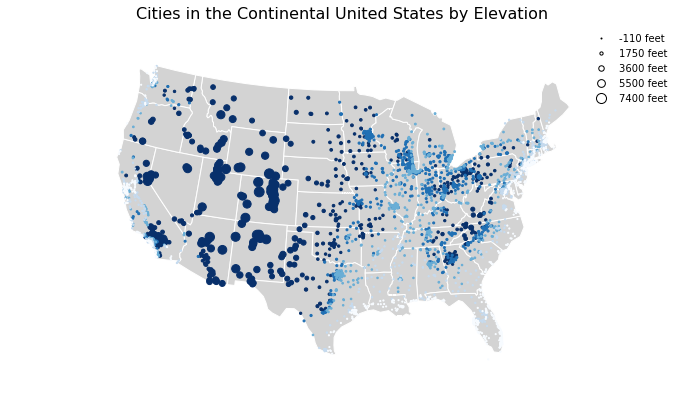

In [10]:
ax = gplt.polyplot(
    contiguous_usa, projection=gcrs.AlbersEqualArea(),
    edgecolor='white', facecolor='lightgray',
    figsize=(12, 8)
)
gplt.pointplot(
    continental_usa_cities, ax=ax, hue='ELEV_IN_FT', cmap='Blues',
    scheme='quantiles',
    scale='ELEV_IN_FT', limits=(1, 10),
    legend=True, legend_var='scale',
    legend_kwargs={'frameon': False},
    legend_values=[-110, 1750, 3600, 5500, 7400],
    legend_labels=['-110 feet', '1750 feet', '3600 feet', '5500 feet', '7400 feet']
)
ax.set_title('Cities in the Continental United States by Elevation', fontsize=16)


<GeoAxesSubplot:>

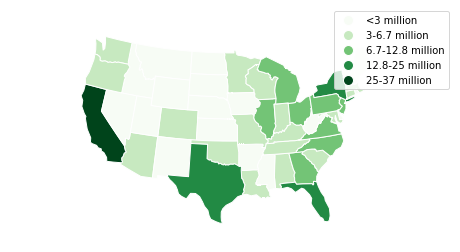

In [11]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True,
    scheme='FisherJenks',
    legend_labels=[
        '<3 million', '3-6.7 million', '6.7-12.8 million',
        '12.8-25 million', '25-37 million'
    ]
)

/home/kesoh/anaconda3/envs/geo/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/kesoh/anaconda3/envs/geo/lib/python3.7/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

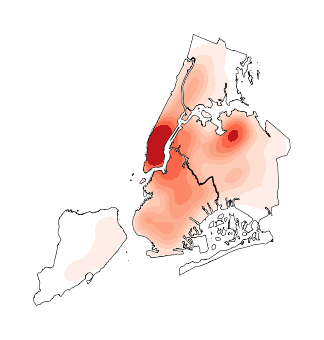

In [12]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

ax = gplt.kdeplot(collisions, cmap='Reds', shade=True, clip=boroughs, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, zorder=1, ax=ax)

In [28]:
import geopandas, geoplot
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

<AxesSubplot:>

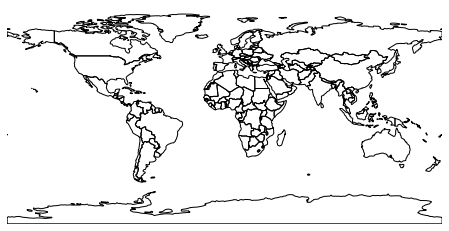

In [29]:
geoplot.polyplot(world, figsize=(8, 4))

/home/kesoh/anaconda3/envs/geo/lib/python3.7/site-packages/geoplot/geoplot.py:715: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  'Plot extent lies outside of the Orthographic projection\'s '
/home/kesoh/anaconda3/envs/geo/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  after removing the cwd from sys.path.


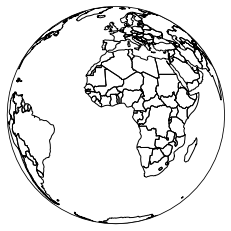

In [30]:
ax = geoplot.polyplot(
    world, projection=geoplot.crs.Orthographic(), figsize=(8, 4)
)
ax.outline_patch.set_visible(True)

<AxesSubplot:>

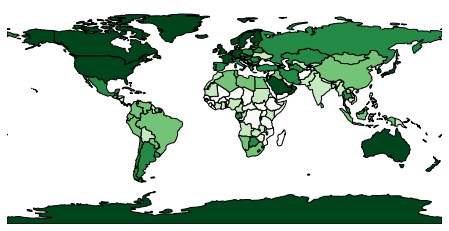

In [31]:
import mapclassify
gpd_per_person = world['gdp_md_est'] / world['pop_est']
scheme = mapclassify.Quantiles(gpd_per_person, k=5)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world, hue=gpd_per_person, scheme=scheme,
    cmap='Greens', figsize=(8, 4)
)


<AxesSubplot:>

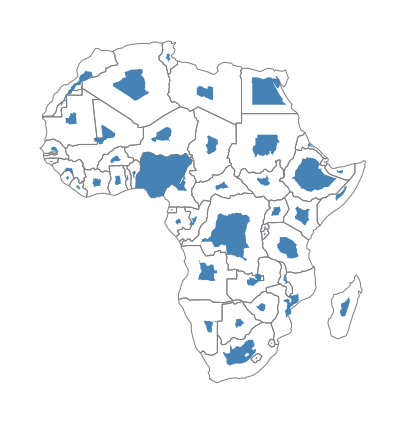

In [32]:
africa = world.query('continent == "Africa"')
ax = geoplot.cartogram(
    africa, scale='pop_est', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)
geoplot.polyplot(africa, edgecolor='gray', ax=ax)

/home/kesoh/anaconda3/envs/geo/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/kesoh/anaconda3/envs/geo/lib/python3.7/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

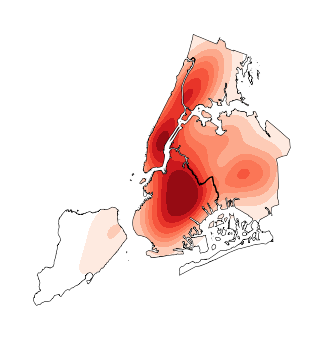

In [33]:
ax = geoplot.kdeplot(
    collisions.head(1000), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

In [34]:
# load the example data
nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
nyc_boroughs

BoroCode       BoroName    Shape_Leng    Shape_Area  \
0         5  Staten Island  330385.03697  1.623853e+09   
1         4         Queens  861038.47930  3.049947e+09   
2         3       Brooklyn  726568.94634  1.959432e+09   
3         1      Manhattan  358532.95642  6.364422e+08   
4         2          Bronx  464517.89055  1.186804e+09   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...

In [35]:
nyc_boroughs.geometry

0    MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...
1    MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...
2    MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...
3    MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...
4    MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...
Name: geometry, dtype: geometry

In [36]:
nyc_boroughs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from functools import partial
from tqdm import tqdm
geolocator = Nominatim(user_agent='geopy')

In [39]:
df = pd.DataFrame({'name': ['buea, cameroon', 'lagos, nigeria', 'juja, kenya']})
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['name'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [40]:
df

name                                           location  \
0  buea, cameroon  (Buea, Fako, Sud-Ouest, Cameroon;Cameroun, (4....   
1  lagos, nigeria  (Lagos, Lagos Island, Lagos, 100242, Nigeria, ...   
2     juja, kenya  (Juja, Kiambu, Central Kenya, Kenya, (-1.10152...   

                           point  
0    (4.1567995, 9.2315519, 0.0)  
1    (6.4550575, 3.3941795, 0.0)  
2  (-1.1015227, 37.0158765, 0.0)

In [41]:
ctry = ['buea, cameroon', 'lagos, nigeria', 'juja, kenya']
f = open("test.loc.csv", "r+")

lat = []
lon = []
Cty = []
Ctr = []
locdat = {}

frq = [18, 25, 10]

for i in ctry:
    location = geolocator.geocode(i)
    lat.append(location.latitude)
    lon.append(location.longitude)
    Cty_pieces = location.address.split(",")
    Cty.append(Cty_pieces[0])
    Ctr.append(Cty_pieces[-1])
    locdat = {'City':Cty, 'Country':Ctr, 'Freq':frq, 'Lat':lat, 'Lon':lon}

In [42]:
df = pd.DataFrame(locdat)
df

City             Country  Freq       Lat        Lon
0   Buea   Cameroon;Cameroun    18  4.156799   9.231552
1  Lagos             Nigeria    25  6.455057   3.394179
2   Juja               Kenya    10 -1.101523  37.015876

In [81]:
gdf = geopandas.GeoDataFrame(locdat, geometry=geopandas.points_from_xy(df['Lon'], df['Lat']))

In [82]:
gdf

City             Country  Freq       Lat        Lon  \
0   Buea   Cameroon;Cameroun    18  4.156799   9.231552   
1  Lagos             Nigeria    25  6.455057   3.394179   
2   Juja               Kenya    10 -1.101523  37.015876   

                    geometry  
0    POINT (9.23155 4.15680)  
1    POINT (3.39418 6.45506)  
2  POINT (37.01588 -1.10152)

In [45]:
#gdf = geopandas.GeoDataFrame(locdat, geometry=geopandas.points_from_xy(df.Lon, df.Lat))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [48]:
help(geoplot.pointplot)

Help on function pointplot in module geoplot.geoplot:

pointplot(df, projection=None, hue=None, cmap=None, norm=None, scheme=None, scale=None, limits=(1, 5), scale_func=None, legend=False, legend_var=None, legend_values=None, legend_labels=None, legend_kwargs=None, figsize=(8, 6), extent=None, ax=None, **kwargs)
    A geospatial scatter plot.
    
    Parameters
    ----------
    df : GeoDataFrame
        The data being plotted.
    projection : geoplot.crs object instance, optional
        The projection to use. For reference see
        `Working with Projections
        <https://residentmario.github.io/geoplot/user_guide/Working_with_Projections.html>`_.
    hue : None, Series, GeoSeries, iterable, or str, optional
        The column in the dataset (or an iterable of some other data) used to color the points.
        For a reference on this and the other hue-related parameters that follow, see
        `Customizing Plots#Hue
        <https://residentmario.github.io/geoplot/user_guide

<AxesSubplot:>

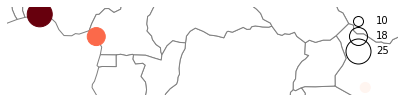

In [90]:
# We restrict to Africa.
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='gray', figsize=(7, 8))

# We can now plot our ``GeoDataFrame``.
#gdf.plot(ax=ax, color='brown')
geoplot.pointplot(gdf, 
                  ax=ax, hue='Freq', cmap='Reds',
                  scheme='quantiles',
                  scale='Freq', limits=(10,25),
                  legend=True, legend_var='scale',
                  legend_kwargs={'frameon': False},
                  legend_values=[10, 18, 25],
                  legend_labels=['10', '18', '25']
                 )

#plt.show()

In [92]:
with open("apol1.csv", "r+") as a:
    apo = pd.read_csv(a)

In [55]:
apo

Country    G1    G2                       Ref    Lat  \
0                    Algeria   1.8   0.0               Kopp et al.  32.00   
1                     Angola  14.9  18.7              Pinto et al. -17.00   
2                     Angola   4.5   9.6              Pinto et al. -15.60   
3                     Angola   4.5   9.6              Pinto et al. -14.60   
4                     Angola   3.0  10.6              Pinto et al. -15.80   
5                     Angola   0.0  14.3              Pinto et al. -15.90   
6                     Angola   0.0   1.4              Pinto et al. -16.30   
7                   Botswana   5.5   5.5              Limou et al. -24.60   
8                   Cameroon   0.8   3.3  Tzur et al.;Behar et al.  12.50   
9                   Cameroon  16.4  12.3  Tzur et al.;Behar et al.   6.50   
10  Central African Republic   4.2   8.3               Kopp et al.   4.00   
11                  Ethiopia   0.0   0.0  Tzur et al.;Behar et al.  12.00   
12                  Ethiopia   0.0   0.0  Tzur et al.;Behar et al.  11.50   
13                  Ethiopia   2.0   2.7  Tzur et al.;Behar et al.   8.30   
14                  Ethiopia   0.0   0.0  Tzur et al.;Behar et al.   7.60   
15                  Ethiopia   0.0   0.0  Tzur et al.;Behar et al.   9.00   
16                     Ghana  43.0  11.0            Thomson et al.   6.70   
17                     Ghana  40.9  12.9  Tzur et al.;Behar et al.   5.80   
18                     Ghana  11.4  21.4  Tzur et al.;Behar et al.  10.70   
19                     Ghana  27.0  17.0            Thomson et al.   5.60   
20                    Guinea  15.4  18.8             Cooper et al.   9.80   
21                     Kenya   5.0   6.0            Thomson et al.  -0.40   
22                     Kenya   8.0   9.0            Thomson et al.  -0.50   
23                     Kenya   5.0   7.0               Kopp et al.   0.60   
24                     Kenya   2.0   3.0            Thomson et al.  -1.10   
25                    Malawi  12.0  12.0  Tzur et al.;Behar et al. -13.90   
26                Mozambique  12.2  11.0  Tzur et al.;Behar et al. -17.50   
27                Mozambique  17.4  21.7              Pinto et al. -24.30   
28                   Nigeria  49.0   NaN      1000 genomes project   9.10   
29                   Nigeria  49.0  17.0            Thomson et al.   6.50   
30                   Nigeria  38.0   8.0           Genovese et al.   7.40   
31     Republic of the Congo  10.9   4.5  Tzur et al.;Behar et al.  -4.30   
32       São Tomé e Príncipe  20.3  10.1              Pinto et al.   0.25   
33                   Senegal   5.0  20.0               Kopp et al.  12.00   
34              Sierra Leone  12.0   NaN      1000 genomes project   8.60   
35                   Somalia   0.0   2.0            Thomson et al.   2.00   
36              South Africa   3.6   5.8             Matsha et al. -33.90   
37              South Africa   5.3   5.5              Limou et al. -29.90   
38                     Sudan   0.0   5.0  Tzur et al.;Behar et al.  13.10   
39                The Gambia  24.0   NaN      1000 genomes project  13.20   
40                    Uganda   3.3   7.2             Cooper et al.   1.90   

     Lon  
0    3.0  
1   12.6  
2   13.1  
3   13.2  
4   12.1  
5   12.6  
6   16.0  
7   25.9  
8   14.5  
9   11.5  
10  17.0  
11  41.5  
12  38.5  
13  34.6  
14  37.2  
15  38.7  
16  -1.6  
17  -2.8  
18  -1.3  
19  -0.2  
20 -13.6  
21  37.0  
22  34.7  
23  34.6  
24  35.9  
25  33.7  
26  35.0  
27  32.9  
28   7.4  
29   7.5  
30   3.9  
31  15.3  
32   6.6  
33 -12.0  
34 -11.8  
35  45.4  
36  18.4  
37  30.9  
38  30.4  
39 -16.3  
40  33.3

In [93]:
gdf = geopandas.GeoDataFrame(apo, geometry=geopandas.points_from_xy(apo.Lon, apo.Lat))

In [94]:
gdf

Country    G1    G2  ...    Lat   Lon  \
0                    Algeria   1.8   0.0  ...  32.00   3.0   
1                     Angola  14.9  18.7  ... -17.00  12.6   
2                     Angola   4.5   9.6  ... -15.60  13.1   
3                     Angola   4.5   9.6  ... -14.60  13.2   
4                     Angola   3.0  10.6  ... -15.80  12.1   
5                     Angola   0.0  14.3  ... -15.90  12.6   
6                     Angola   0.0   1.4  ... -16.30  16.0   
7                   Botswana   5.5   5.5  ... -24.60  25.9   
8                   Cameroon   0.8   3.3  ...  12.50  14.5   
9                   Cameroon  16.4  12.3  ...   6.50  11.5   
10  Central African Republic   4.2   8.3  ...   4.00  17.0   
11                  Ethiopia   0.0   0.0  ...  12.00  41.5   
12                  Ethiopia   0.0   0.0  ...  11.50  38.5   
13                  Ethiopia   2.0   2.7  ...   8.30  34.6   
14                  Ethiopia   0.0   0.0  ...   7.60  37.2   
15                  Ethiopia   0.0   0.0  ...   9.00  38.7   
16                     Ghana  43.0  11.0  ...   6.70  -1.6   
17                     Ghana  40.9  12.9  ...   5.80  -2.8   
18                     Ghana  11.4  21.4  ...  10.70  -1.3   
19                     Ghana  27.0  17.0  ...   5.60  -0.2   
20                    Guinea  15.4  18.8  ...   9.80 -13.6   
21                     Kenya   5.0   6.0  ...  -0.40  37.0   
22                     Kenya   8.0   9.0  ...  -0.50  34.7   
23                     Kenya   5.0   7.0  ...   0.60  34.6   
24                     Kenya   2.0   3.0  ...  -1.10  35.9   
25                    Malawi  12.0  12.0  ... -13.90  33.7   
26                Mozambique  12.2  11.0  ... -17.50  35.0   
27                Mozambique  17.4  21.7  ... -24.30  32.9   
28                   Nigeria  49.0   NaN  ...   9.10   7.4   
29                   Nigeria  49.0  17.0  ...   6.50   7.5   
30                   Nigeria  38.0   8.0  ...   7.40   3.9   
31     Republic of the Congo  10.9   4.5  ...  -4.30  15.3   
32       São Tomé e Príncipe  20.3  10.1  ...   0.25   6.6   
33                   Senegal   5.0  20.0  ...  12.00 -12.0   
34              Sierra Leone  12.0   NaN  ...   8.60 -11.8   
35                   Somalia   0.0   2.0  ...   2.00  45.4   
36              South Africa   3.6   5.8  ... -33.90  18.4   
37              South Africa   5.3   5.5  ... -29.90  30.9   
38                     Sudan   0.0   5.0  ...  13.10  30.4   
39                The Gambia  24.0   NaN  ...  13.20 -16.3   
40                    Uganda   3.3   7.2  ...   1.90  33.3   

                      geometry  
0     POINT (3.00000 32.00000)  
1   POINT (12.60000 -17.00000)  
2   POINT (13.10000 -15.60000)  
3   POINT (13.20000 -14.60000)  
4   POINT (12.10000 -15.80000)  
5   POINT (12.60000 -15.90000)  
6   POINT (16.00000 -16.30000)  
7   POINT (25.90000 -24.60000)  
8    POINT (14.50000 12.50000)  
9     POINT (11.50000 6.50000)  
10    POINT (17.00000 4.00000)  
11   POINT (41.50000 12.00000)  
12   POINT (38.50000 11.50000)  
13    POINT (34.60000 8.30000)  
14    POINT (37.20000 7.60000)  
15    POINT (38.70000 9.00000)  
16    POINT (-1.60000 6.70000)  
17    POINT (-2.80000 5.80000)  
18   POINT (-1.30000 10.70000)  
19    POINT (-0.20000 5.60000)  
20   POINT (-13.60000 9.80000)  
21   POINT (37.00000 -0.40000)  
22   POINT (34.70000 -0.50000)  
23    POINT (34.60000 0.60000)  
24   POINT (35.90000 -1.10000)  
25  POINT (33.70000 -13.90000)  
26  POINT (35.00000 -17.50000)  
27  POINT (32.90000 -24.30000)  
28     POINT (7.40000 9.10000)  
29     POINT (7.50000 6.50000)  
30     POINT (3.90000 7.40000)  
31   POINT (15.30000 -4.30000)  
32     POINT (6.60000 0.25000)  
33  POINT (-12.00000 12.00000)  
34   POINT (-11.80000 8.60000)  
35    POINT (45.40000 2.00000)  
36  POINT (18.40000 -33.90000)  
37  POINT (30.90000 -29.90000)  
38   POINT (30.40000 13.10000)  
39  POINT (-16.30000 13.20000)  
40    POINT (33.30000 1.90000)  

[41 rows x 7 columns]

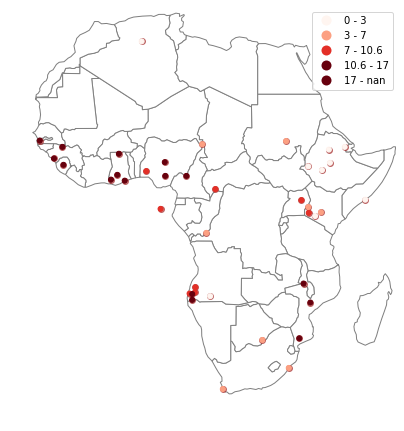

In [102]:
import matplotlib.pyplot as plt
ax = world[world.continent == "Africa"].plot(color = 'white', edgecolor = 'gray', markersize = 5, marker = 'o', figsize = (7, 8))
gdf.plot(ax=ax, color = 'brown', alpha = 0.6)
geoplot.pointplot(gdf, ax=ax, legend=True, hue='G2', cmap='Reds', scheme='quantiles')
plt.show()

In [106]:
fig = px.density_mapbox(gdf, lat='Lat', lon='Lon', z='G2', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [66]:
gdf

Country    G1    G2  ...    Lat   Lon  \
0                    Algeria   1.8   0.0  ...  32.00   3.0   
1                     Angola  14.9  18.7  ... -17.00  12.6   
2                     Angola   4.5   9.6  ... -15.60  13.1   
3                     Angola   4.5   9.6  ... -14.60  13.2   
4                     Angola   3.0  10.6  ... -15.80  12.1   
5                     Angola   0.0  14.3  ... -15.90  12.6   
6                     Angola   0.0   1.4  ... -16.30  16.0   
7                   Botswana   5.5   5.5  ... -24.60  25.9   
8                   Cameroon   0.8   3.3  ...  12.50  14.5   
9                   Cameroon  16.4  12.3  ...   6.50  11.5   
10  Central African Republic   4.2   8.3  ...   4.00  17.0   
11                  Ethiopia   0.0   0.0  ...  12.00  41.5   
12                  Ethiopia   0.0   0.0  ...  11.50  38.5   
13                  Ethiopia   2.0   2.7  ...   8.30  34.6   
14                  Ethiopia   0.0   0.0  ...   7.60  37.2   
15                  Ethiopia   0.0   0.0  ...   9.00  38.7   
16                     Ghana  43.0  11.0  ...   6.70  -1.6   
17                     Ghana  40.9  12.9  ...   5.80  -2.8   
18                     Ghana  11.4  21.4  ...  10.70  -1.3   
19                     Ghana  27.0  17.0  ...   5.60  -0.2   
20                    Guinea  15.4  18.8  ...   9.80 -13.6   
21                     Kenya   5.0   6.0  ...  -0.40  37.0   
22                     Kenya   8.0   9.0  ...  -0.50  34.7   
23                     Kenya   5.0   7.0  ...   0.60  34.6   
24                     Kenya   2.0   3.0  ...  -1.10  35.9   
25                    Malawi  12.0  12.0  ... -13.90  33.7   
26                Mozambique  12.2  11.0  ... -17.50  35.0   
27                Mozambique  17.4  21.7  ... -24.30  32.9   
28                   Nigeria  49.0   NaN  ...   9.10   7.4   
29                   Nigeria  49.0  17.0  ...   6.50   7.5   
30                   Nigeria  38.0   8.0  ...   7.40   3.9   
31     Republic of the Congo  10.9   4.5  ...  -4.30  15.3   
32       São Tomé e Príncipe  20.3  10.1  ...   0.25   6.6   
33                   Senegal   5.0  20.0  ...  12.00 -12.0   
34              Sierra Leone  12.0   NaN  ...   8.60 -11.8   
35                   Somalia   0.0   2.0  ...   2.00  45.4   
36              South Africa   3.6   5.8  ... -33.90  18.4   
37              South Africa   5.3   5.5  ... -29.90  30.9   
38                     Sudan   0.0   5.0  ...  13.10  30.4   
39                The Gambia  24.0   NaN  ...  13.20 -16.3   
40                    Uganda   3.3   7.2  ...   1.90  33.3   

                      geometry  
0     POINT (3.00000 32.00000)  
1   POINT (12.60000 -17.00000)  
2   POINT (13.10000 -15.60000)  
3   POINT (13.20000 -14.60000)  
4   POINT (12.10000 -15.80000)  
5   POINT (12.60000 -15.90000)  
6   POINT (16.00000 -16.30000)  
7   POINT (25.90000 -24.60000)  
8    POINT (14.50000 12.50000)  
9     POINT (11.50000 6.50000)  
10    POINT (17.00000 4.00000)  
11   POINT (41.50000 12.00000)  
12   POINT (38.50000 11.50000)  
13    POINT (34.60000 8.30000)  
14    POINT (37.20000 7.60000)  
15    POINT (38.70000 9.00000)  
16    POINT (-1.60000 6.70000)  
17    POINT (-2.80000 5.80000)  
18   POINT (-1.30000 10.70000)  
19    POINT (-0.20000 5.60000)  
20   POINT (-13.60000 9.80000)  
21   POINT (37.00000 -0.40000)  
22   POINT (34.70000 -0.50000)  
23    POINT (34.60000 0.60000)  
24   POINT (35.90000 -1.10000)  
25  POINT (33.70000 -13.90000)  
26  POINT (35.00000 -17.50000)  
27  POINT (32.90000 -24.30000)  
28     POINT (7.40000 9.10000)  
29     POINT (7.50000 6.50000)  
30     POINT (3.90000 7.40000)  
31   POINT (15.30000 -4.30000)  
32     POINT (6.60000 0.25000)  
33  POINT (-12.00000 12.00000)  
34   POINT (-11.80000 8.60000)  
35    POINT (45.40000 2.00000)  
36  POINT (18.40000 -33.90000)  
37  POINT (30.90000 -29.90000)  
38   POINT (30.40000 13.10000)  
39  POINT (-16.30000 13.20000)  
40    POINT (33.30000 1.90000)  

[41 rows x 7 columns]

In [72]:
geoplot.pointplot(gdf, 
                  ax=ax, 
                  hue='G2', 
                  cmap='Reds', 
                  scheme='quantiles', 
                  scale='G2', 
                  legend=True, 
                  legend_var='scale', 
                 )

<AxesSubplot:>

In [152]:
import mapclassify

/home/kesoh/anaconda3/envs/geo/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/kesoh/anaconda3/envs/geo/lib/python3.7/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

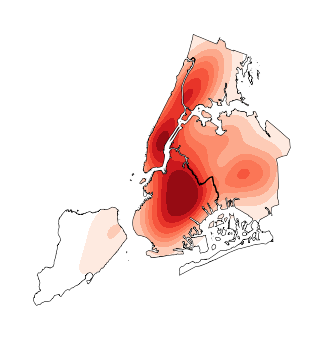

In [158]:
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

ax = geoplot.kdeplot(
    collisions.head(1000), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)


In [159]:
boroughs

BoroCode       BoroName    Shape_Leng    Shape_Area  \
0         5  Staten Island  330385.03697  1.623853e+09   
1         4         Queens  861038.47930  3.049947e+09   
2         3       Brooklyn  726568.94634  1.959432e+09   
3         1      Manhattan  358532.95642  6.364422e+08   
4         2          Bronx  464517.89055  1.186804e+09   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...

In [103]:
import plotly.express as px

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Magnitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()